## Notebook to examine how stars would shift in V vs (V-K) space when spot temperature and filling factor are adjusted relative to photospheric temperature. Want to create upper and lower bound for Pleides data and find range of parameters (SpTemp, FF) given PhTemp for which stars remain within bounds. Not quite finished.

In [2]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd

import getMag_hires
getMag_hires = getMag_hires.getMag_hires

import HELP
et_model = HELP.get_model
make_spotmodel = HELP.make_spotmodel
Dotter_rad = HELP.Dotter_rad
MagConvert = HELP.MagConvert
V_VKPlotData = HELP.V_VKPlotData
PleiadesDeltaV_VK = HELP.PleiadesDeltaV_VK
CMDData = HELP.CMDData
DeltaVfunc = HELP.DeltaVfunc

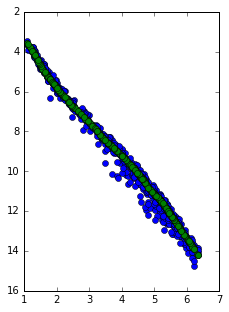

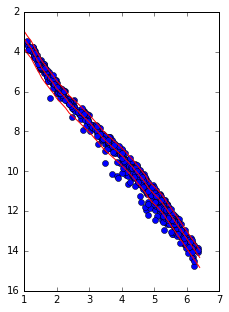

In [41]:
KamaiIsochrone = open('data/Kamai_Isochrone.tbl','r')
names = KamaiIsochrone.readline().split
KamaiIsochrone.close()
KamaiIsochrone = pd.read_table('data/Kamai_Isochrone.tbl',sep=None,engine='python')

KamaiV = [i-5.67 for i in KamaiIsochrone['V']]
KamaiVK = KamaiIsochrone['V - K']

PleiaVK,PleiaDeltaV = PleiadesDeltaV_VK('V-K','V')
KamaiVDiscrete = np.interp(PleiaVK,KamaiVK,KamaiV)
PleiaV = [PleiaDeltaV[i] + KamaiVDiscrete[i] for i in range(len(PleiaDeltaV))]

plt.figure(figsize=(3.5,5))
plt.plot(PleiaVK,PleiaV,'o',PleiaVK,KamaiVdiscrete,'o')
plt.gca().invert_yaxis()

UpperBound = [i-0.375 for i in KamaiV] #Upper bound associated with binary brightness cutoff of -0.375 DeltaVmag
LowerBound = [i+0.5 for i in KamaiV]

plt.figure(figsize=(3.5,5))
plt.plot(PleiaVK,PleiaV,'o',KamaiVK,KamaiV,'r-',KamaiVK,UpperBound,'r-',KamaiVK,LowerBound,'r-')
plt.gca().invert_yaxis()

In [55]:
#Loops to pick parameter set, eventually input the mag generation and comparison to isochrone bounds

PhotTemp = 5800
Models = np.arange(PhotTemp,2299,-100) #Temperature range from 7000K through 2300K

FFRange = np.arange(0.,1.01,0.1) #Filling factors from 0. through 1. in steps of 0.1

for i in FFRange:                      #i is current Filling Factor
    for j in Models:                   #j is current Spot Temperature
        TempRatio = j/PhTemp           #SpotTemp/PhotTemp
        
        wavelength,flux_Phoenix,PhTemp,SpTemp,FillFactor = make_spotmodel(PhotTemp,j,i)
        Flux = Dotter_rad(PhotTemp, flux_Phoenix)
        
        Vband,Vcenter,Vmag = getMag_hires('V',wavelength,Flux,'microns')
        Kband,Kcenter,Kmag = getMag_hires('Ks',wavelength,Flux,'microns')
        VKcolor = Vmag-Kmag                                         #Now we have Vmag and (V-K) color for parameters
        
        
        #Need a smooth function for isochrone bounds that can input (V-K) color and report back associated Vmag
        #Have used interpolate for similar comparisons/calculations, but not for a generated disctrete point
        if #Vmag for associated (V-K) color is less that lower bound or greater than upper bound, return false
        
        #plot open circles for false, closed circle for true
        
        